#Midterm Exam part1 morning
##group8
##Member
1. Sathita	Intarachote 6288014
2. Chancheep Mahacharoensuk 6288092
3. Sirada	Vitoonvarakorn 6288156

In [70]:
#for connect to google drive because our group use google collab notebook to work
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
#Data directory
data_dir = '/content/gdrive/My Drive/Colab Notebooks/special_topic_cs/midterm_exam/morning'

!ls '$data_dir'

6288014_6288092_6288156_midtermExam_part1.ipynb  fire.csv


In [72]:
#import library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
#read csv file
data_path = os.path.join(data_dir, 'fire.csv')
df = pd.read_csv(data_path)

#1.Cleaning process

In [74]:
#check column of the csv file
df.columns

Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',
       'STATUS'],
      dtype='object')

In [75]:
#check the content in the file
df.head

<bound method NDFrame.head of        SIZE      FUEL  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY  STATUS
0       1.0  gasoline      10.0     96.0      0.0       75.0       0
1       1.0       NaN      10.0     96.0      0.0       72.0       1
2       1.0  gasoline      10.0     96.0      NaN        NaN       1
3       NaN  gasoline      10.0     96.0      NaN       68.0       1
4       1.0  gasoline      10.0    109.0      4.5       67.0       1
...     ...       ...       ...      ...      ...        ...     ...
17437   7.0       lpg     190.0     86.0      2.2        5.0       0
17438   7.0       lpg     190.0     84.0      2.0        4.0       0
17439   7.0       NaN       NaN     80.0      1.5        3.0       0
17440   7.0       lpg     190.0      NaN      0.4        2.0       0
17441   7.0       lpg     190.0     72.0      NaN        1.0       0

[17442 rows x 7 columns]>

In [76]:
#sum the file that have null or not
df.isnull().sum()

SIZE         3563
FUEL         3513
DISTANCE     3471
DESIBEL      3424
AIRFLOW      3393
FREQUENCY    3566
STATUS          0
dtype: int64

In [77]:
#drop all na bacause for using the data we must cleaning the data first before use it to make the data easier to understand and not have an error.
df = df.dropna()

In [78]:
#check again to confirm that it already clean
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [79]:
#check again
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,gasoline,10.0,96.0,0.0,75.0,0
4,1.0,gasoline,10.0,109.0,4.5,67.0,1
5,1.0,gasoline,10.0,109.0,7.8,66.0,1
9,1.0,gasoline,10.0,93.0,15.4,52.0,1
11,1.0,gasoline,10.0,95.0,15.2,50.0,1


#2.Understand the data

In [80]:
#make the label by ref from fuel (it have 4 categories of fuel) ,since we want to use the data the good thing that you should do is change text to the label for make it easy to visualization.
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['label_code'] = label_enc.fit_transform(df['FUEL'])
print(label_enc.classes_)

df.head()


['gasoline' 'kerosene' 'lpg' 'thinner']


,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,label_code
0,1.0,gasoline,10.0,96.0,0.0,75.0,0,0
4,1.0,gasoline,10.0,109.0,4.5,67.0,1,0
5,1.0,gasoline,10.0,109.0,7.8,66.0,1,0
9,1.0,gasoline,10.0,93.0,15.4,52.0,1,0
11,1.0,gasoline,10.0,95.0,15.2,50.0,1,0


In [81]:
#to check that label code is changed
df.tail()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,label_code
17431,7.0,lpg,190.0,92.0,1.4,11.0,0,2
17432,7.0,lpg,190.0,91.0,1.6,10.0,0,2
17433,7.0,lpg,190.0,92.0,2.0,9.0,0,2
17437,7.0,lpg,190.0,86.0,2.2,5.0,0,2
17438,7.0,lpg,190.0,84.0,2.0,4.0,0,2


In [82]:
#to check the data type
df.dtypes

SIZE          float64
FUEL           object
DISTANCE      float64
DESIBEL       float64
AIRFLOW       float64
FREQUENCY     float64
STATUS          int64
label_code      int64
dtype: object

In [83]:
#try to find the insight
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,label_code
count,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000
mean,3.408735,99.917427,96.391134,7.001391,31.587353,0.501521,1.415472
std,1.751713,55.159701,8.120345,4.769465,21.006376,0.500052,1.192020
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,50.000000,90.250000,3.100000,14.000000,0.000000,0.000000
50%,3.000000,100.000000,95.000000,6.000000,27.000000,1.000000,1.000000
75%,5.000000,150.000000,104.000000,11.300000,47.000000,1.000000,3.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000,3.000000


#3.find the insight from the current data

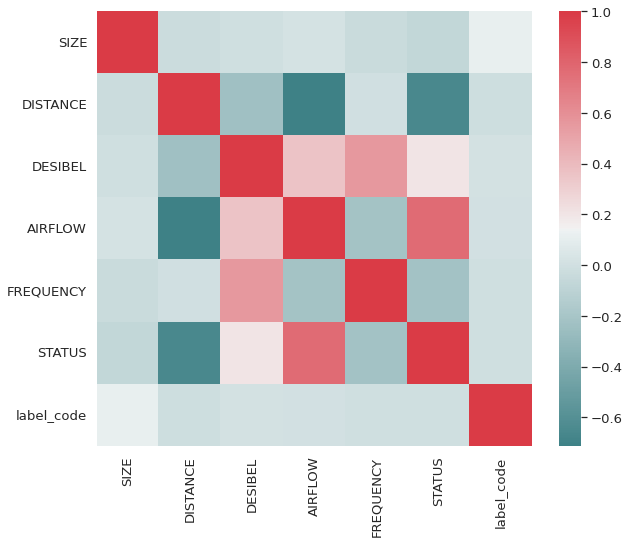

In [84]:
#to find the correlation of the data
fi, axis = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True),
square=True, ax=axis)

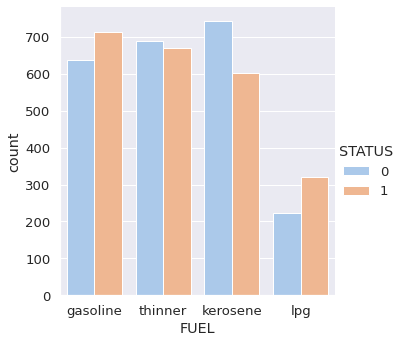

In [89]:
#1 graph
#Let's see the Fuel
#to find the relationship between fuel and extinction status
sns.catplot(
data=df, hue='STATUS',
x='FUEL', kind='count', palette='pastel')

this graph we do it to find the relationship between the fuel and extinction status, from the results it shows that gasoline fuel has the highest rate of going into extinction state while kerosene is the highest in going into non-extinction state.

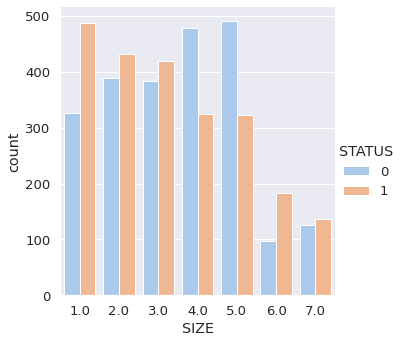

In [90]:
#2 graph
sns.catplot(
data=df, hue='STATUS',
x='SIZE', kind='count', palette='pastel')
#Recorded as 7 cm=1, 12 cm=2, 14cm=3, 16 cm=4, 20 cm=5, Half throttle setting=6, Full throttle setting=7

From the bar plot status it shows that as the fire range increases, it also decreases the chances of having the fire go into extinction state. Showing that the fire is easy to be extinguished when the fire size is still small. As for the settings used in the lpg. It shows that using half-throttle setting are more likely to have chances of extinguish the fire rather than using full-throttle which has the comparatively closer chances for the fire to go into extinction or non-extinction state at the same time.

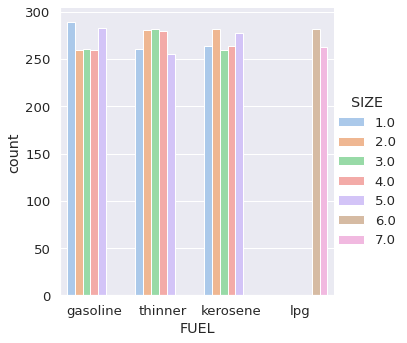

In [94]:
#3 graph
sns.catplot(
data=df, hue='SIZE',
x='FUEL', kind='count', palette='pastel')
#Recorded as 7 cm=1, 12 cm=2, 14cm=3, 16 cm=4, 20 cm=5, Half throttle setting=6, Full throttle setting=7

From the bar plot results it shows that gasoline were used to produced the 7cm and 20 cm fire for the most. While thinner has the most fire produced from range 12 cm, 14 cm, and 16 cm at a close amount. Kerosene has the highest amount of fire range from 12 cm and 20 cm. As for the lpg fire, Half-throttle settings was more preferred than the full-throttle setting.

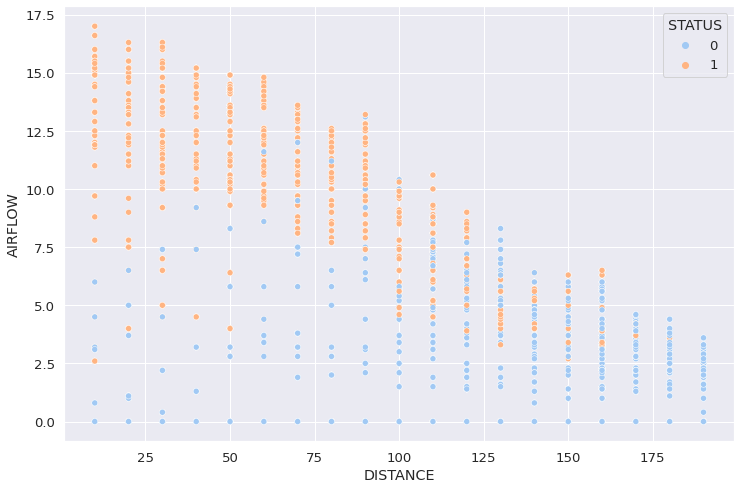

In [97]:
#4 graph
#correlation of distance and airflow to find that these attributes can affect the fire extinguishing
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="DISTANCE", y="AIRFLOW", hue='STATUS', data=df , palette='pastel')

Text(0.5, 1.0, 'The distribution of the size for the extinction state')

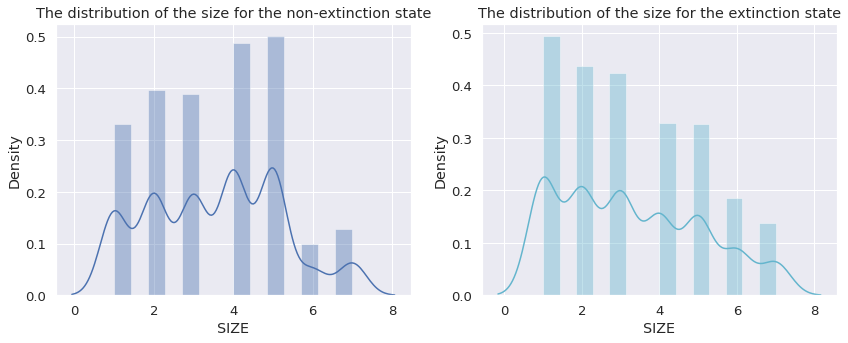

In [96]:
#5 graph
# These 2 graphs represent the distribtion of the size for the non-extinction state and extinction state.
fi= plt.figure(figsize=(14,5))

axis=fi.add_subplot(121)
sns.distplot(df[(df.STATUS == 0)]['SIZE'],color='b',ax=axis)
axis.set_title('The distribution of the size for the non-extinction state')

axis=fi.add_subplot(122)
sns.distplot(df[(df.STATUS == 1)]['SIZE'],color='c',ax=axis)
axis.set_title('The distribution of the size for the extinction state')

#Conclusion

We have many conclusions to summarize best from the above.
1. In the first graph, gasoline is the easiest to extinguish, while kerosene is the hardest to extinguish.
2. In the second graph, using a half-throttle setting is more likely to extinguish the fire than using a full-throttle, and it has lesser chances of extinguishing the fire if the fire size increases.
3. The LPG fire, Half-throttle settings, was more preferred than the full-throttle setting in the third graph.
4. In the fourth graph, If it has much airflow, it will be easier to extinguish, and if it has more distance, it will be much harder to extinguish.
5. As can be seen in the fifth graph, if the flame size made by liquid fuel is
large (16-20 cm or label 4-5), it's hard to extinguish the fire. Same as above, if the size of flame made by LPG fuel is extensive (Full throttle setting), it is hard to extinguish the fire.


Key indicator for successful fire extinguish: Airflow, Small fire size, Closer Distance, Fuel type.

<hr />